In [28]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
np.random.seed(0)

In [30]:
def corr_vals(x, y):
    x = np.asarray(x); y = np.asarray(y)
    if x.size != y.size:
        raise ValueError("x and y must have the same length.")
    pr, pp = stats.pearsonr(x, y)
    sr, sp = stats.spearmanr(x, y)
    return pr, pp, sr, sp

fmt_r = lambda v: f"{float(v):.3f}"
fmt_p = lambda v: f"{float(v):.5f}"

In [31]:
age_simple   = np.array([1,2,3,4,5,6])
price_simple = np.array([40,36,32,29,25,22]) + np.array([0.2,-0.2,0.1,0.0,-0.1,0.2])

In [32]:
rP, pP, rS, pS = corr_vals(age_simple, price_simple)

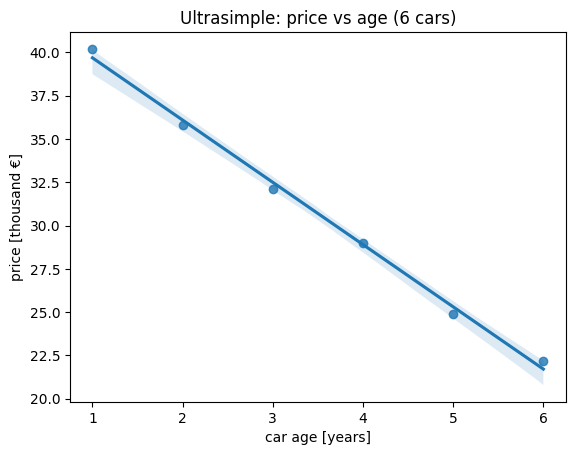

Pearson r=-0.998, p=0.00001
Spearman r=-1.000, p=0.00000


In [33]:
sns.regplot(x=age_simple, y=price_simple, ci=95)
plt.title("Ultrasimple: price vs age (6 cars)")
plt.xlabel("car age [years]"); plt.ylabel("price [thousand €]")
plt.show()

print(f"Pearson r={fmt_r(rP)}, p={fmt_p(pP)}")
print(f"Spearman r={fmt_r(rS)}, p={fmt_p(pS)}")

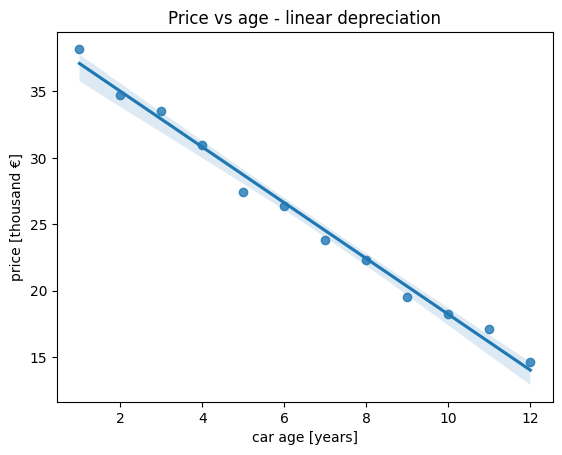

Pearson r=-0.995, p=0.00000
Spearman r=-1.000, p=0.00000


In [21]:
age_years    = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
price_age_k  = np.array([38,35,33,31,28,26,24,22,20,18,17,15]) + np.array([0.2,-0.3,0.5,0.0,-0.6,0.4,-0.2,0.3,-0.5,0.2,0.1,-0.4])

rP, pP, rS, pS = corr_vals(age_years, price_age_k)

sns.regplot(x=age_years, y=price_age_k, ci=95)
plt.title("Price vs age - linear depreciation")
plt.xlabel("car age [years]")
plt.ylabel("price [thousand €]")
plt.show()

print(f"Pearson r={fmt_r(rP)}, p={fmt_p(pP)}")
print(f"Spearman r={fmt_r(rS)}, p={fmt_p(pS)}")

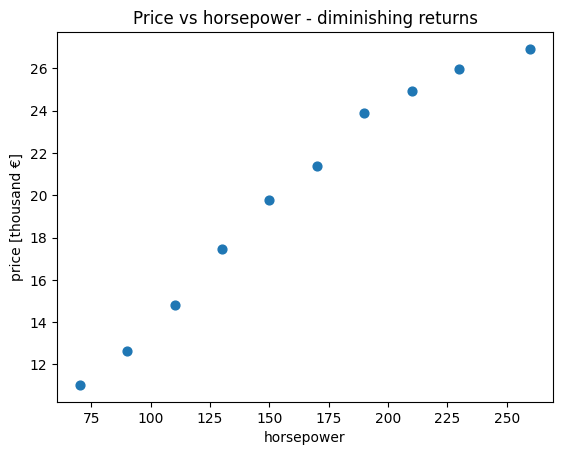

Spearman r=1.000, p=0.00000
Pearson  r=0.985, p=0.00000


In [22]:
hp         = np.array([70, 90,110,130,150,170,190,210,230,260])
price_hp_k = np.array([10.5,12.5,14.5,16.8,19.2,21.7,23.6,25.0,26.0,26.8]) + np.random.normal(0,0.3,10)

rP, pP, rS, pS = corr_vals(hp, price_hp_k)

plt.scatter(hp, price_hp_k, s=40)
plt.title("Price vs horsepower - diminishing returns")
plt.xlabel("horsepower"); plt.ylabel("price [thousand €]")
plt.show()

print(f"Spearman r={fmt_r(rS)}, p={fmt_p(pS)}")
print(f"Pearson  r={fmt_r(rP)}, p={fmt_p(pP)}")

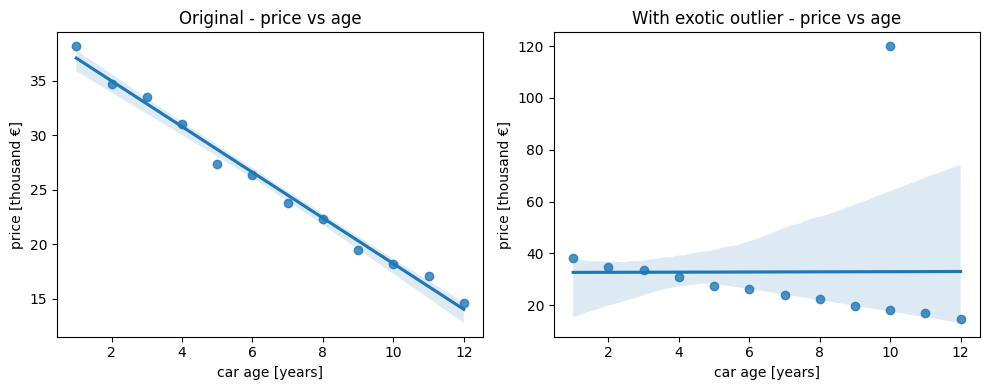

Original     → Pearson r=-0.995 | Spearman r=-1.000
With outlier → Pearson r=0.004 | Spearman r=-0.726


In [25]:
age_o   = np.r_[age_years, 10]
price_o = np.r_[price_age_k, 120.0]

rP0, _, rS0, _ = corr_vals(age_years, price_age_k)
rP1, _, rS1, _ = corr_vals(age_o, price_o)

fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x=age_years, y=price_age_k, ax=ax[0], ci=95)
ax[0].set_title("Original - price vs age")
ax[0].set(xlabel="car age [years]", ylabel="price [thousand €]")

sns.regplot(x=age_o, y=price_o, ax=ax[1], ci=95)
ax[1].set_title("With exotic outlier - price vs age")
ax[1].set(xlabel="car age [years]", ylabel="price [thousand €]")

plt.tight_layout(); plt.show()

print(f"Original     → Pearson r={fmt_r(rP0)} | Spearman r={fmt_r(rS0)}")
print(f"With outlier → Pearson r={fmt_r(rP1)} | Spearman r={fmt_r(rS1)}")

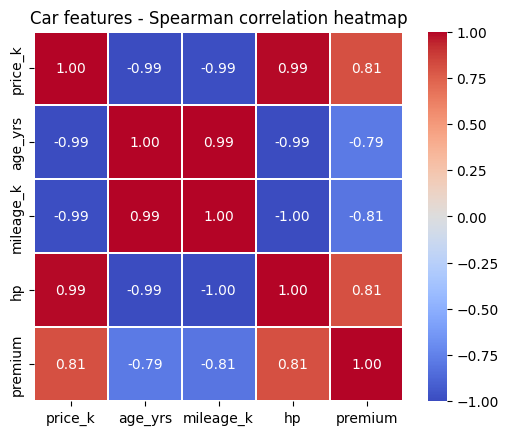

Top 3 absolute correlations with price_k (Spearman):
age_yrs      0.993
mileage_k    0.991
hp           0.991
Name: price_k, dtype: float64


In [27]:
cars = pd.DataFrame({
    "price_k":   [12,15,18,22,26,30,35,40,22,28,33,45],
    "age_yrs":   [12,10, 9, 7, 5, 4, 3, 1, 6,  5,  3, 1],
    "mileage_k": [180,160,140,120, 90, 80, 60,20,110, 85, 50,15],
    "hp":        [ 75, 90,110,130,150,170,190,220,140,160,200,320],
    "premium":   [  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1]
})

spearman_corr = cars.corr(method="spearman")

ax = sns.heatmap(spearman_corr, vmin=-1, vmax=1, cmap="coolwarm",
                 square=True, linecolor='white', linewidths=.2, annot=False)

norm, cmap = ax.collections[0].norm, ax.collections[0].cmap
for i, row in enumerate(spearman_corr.values):
    for j, v in enumerate(row):
        r,g,b,_ = cmap(norm(v)); lum = 0.299*r + 0.587*g + 0.114*b
        ax.text(j+.5, i+.5, f"{v:.2f}", ha="center", va="center",
                fontsize=10, color="white")

plt.title("Car features - Spearman correlation heatmap")
plt.show()

top = (
    spearman_corr["price_k"]
    .drop("price_k")
    .abs()
    .sort_values(ascending=False)
    .head(3)
)
print("Top 3 absolute correlations with price_k (Spearman):")
print(top.round(3))
